#Table Of Content

1. Environment Setup
2. The Exponential Distribution
3. The CDF of the Exponential Distribution
4. Appendix
5. Additional Reading


#Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#The Exponential Distribution

The exponential distribution is described by its probability density function (PDF), which is given as:



```
f(x) = λ * e^(-λx)
```

```'λ'``` (lambda) is the rate parameter. It signifies the average event rate over a unit of time.


```'x'``` represents the time between events.

```'e'``` is Euler's number, approximately equal to 2.71828.

**NOTE:** The decay parameter ```'m' ```is another way to represent the same concept as 'λ'. That is, the two symbols can be used interchangeably







Suppose, for example,  you want to model the time between customer arrivals at a coffee shop. On average, customers arrive at a rate of 0.2 customers per minute. We can calculate both 'μ' (the average TIME between arrivals) for this example:

In [2]:
# Given rate parameter (λ)
lambda_value = 0.2

# Calculate mean time between customer arrivals (μ)
mean_time = 1 / lambda_value

# Display the values
print(f"Rate Parameter (λ): {lambda_value} customers per minute")
print(f"Average Time Between Arrivals (μ): {mean_time} minutes")


Rate Parameter (λ): 0.2 customers per minute
Average Time Between Arrivals (μ): 5.0 minutes


This relationship signifies that 'm' is the reciprocal of 'μ.' If you know one, you can easily calculate the other. The time between customer arrivals at a coffee shop can be modeled using the exponential distribution. In this case, the exponential distribution helps estimate how long it will likely take for the next customer to arrive after one has just entered the shop. This is useful for coffee shop owners to manage their staffing and service speed efficiently.

**Example**



Suppose you want to model the time between car accidents on a specific road. Let's say that, on average, an accident occurs every 10 days. You can use the exponential distribution to analyze this scenario.

In this case:

X represents the time (in days) between car accidents.

μ (average time between accidents) is 10 days.

'm' is the decay parameter, calculated as `1 / μ`, so `'m'` equals 0.1:




In [ ]:
m = 0.1  # Decay parameter (1/μ = 1/10)

We'll create a range of time values ('x') to represent the time between car accidents

In [ ]:
x = np.linspace(0, 50, 100)  # Define a range of time values


Using the decay parameter 'm' and the range of time values, we calculate the Probability Density Function ('pdf') using the exponential distribution formula: pdf = m * np.exp(-m * x).



In [ ]:
pdf = m * np.exp(-m * x)


Now, let's create a plot to visualize the exponential distribution. This plot will help us understand the probability of different time intervals between car accidents.

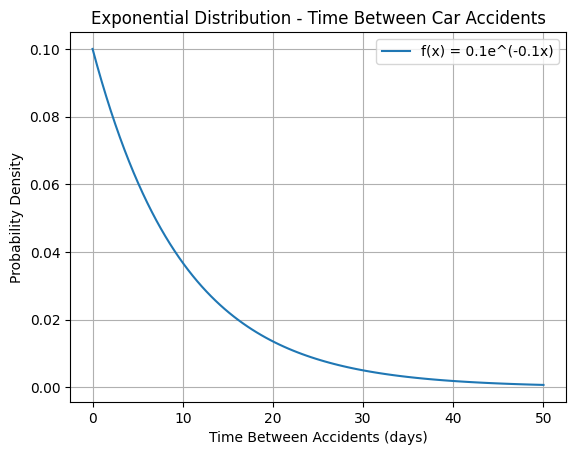

In [ ]:
plt.plot(x, pdf, label=f'f(x) = {m}e^(-{m}x)')
plt.xlabel('Time Between Accidents (days)')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution - Time Between Car Accidents')
plt.legend()
plt.grid(True)
plt.show()


The resulting plot represents the exponential distribution for the time between car accidents. Observe how the probability changes as the time between accidents varies;

 - In a very short time interval (e.g., a minute or an hour), there are fewer opportunities for an event (car accident) not to occur, so the probability of an event happening is relatively high.

- In a longer time interval (e.g., a day, a week, or a month), there are more opportunities for an event (car accident) not to occur, so the probability of an event happening within that extended period is relatively lower compared to the short time intervals.


**Memorylessness Of The Exponential Distribution**

A random variable X follows the memoryless property if, for any positive numbers 's' and 't', the following equation holds:

 P(X > s + t | X > s) = P(X > t)

In simpler terms, the memoryless property means that the probability that an event will occur at some time 't' in the future, given that it hasn't occurred by time 's', is the same as the probability that the event will occur at time 't' starting from scratch, without any knowledge of what happened before 's'.

In the context of the exponential distribution, which is memoryless:

P(X > s + t | X > s) = P(X > t)

Where:
- X is a random variable following the exponential distribution.
- 's' represents a starting point in time.
- 't' represents a time interval in the future.
- P(X > s + t) is the probability that the event will occur after 's' time has passed.
- P(X > s) is the probability that the event hasn't occurred by time 's'.
- P(X > t) is the probability that the event will occur at time 't'.

The memoryless property implies that past history doesn't affect future probabilities. In other words, if you're waiting for a specific event to happen, and it hasn't occurred up to a certain point, the probability that it will occur in the next interval of time is the same as if you had started from scratch, as if no time had passed at all. This is a key characteristic of the exponential distribution and is often used to model processes where events occur independently and randomly.

# Cumulative Density Function (CDF)

Recall from earlier lessons that the CDF gives us the probability that a random variable is less than or equal to a specific value. In the context of the exponential distribution, the CDF represents the probability that the time between events is less than or equal to a certain time.The CDF of the exponential distribution can be written as:

>```F(x) = 1 - e^(-λx)```

The exponential distribution CDF is valuable in various real-world scenarios. For instance, if we want to know the probability that a customer arrives at the coffee shop within the next 3 minutes, we can use the CDF:

>```P(X ≤ 3) = 1 - e^(-λ * 3)```






In [ ]:
# Given rate parameter (λ)
lambda_value = 0.2  # 0.2 customers per minute

# Time we're interested in (x)
x = 3

# Calculate the probability using the CDF formula
probability = 1 - np.exp(-lambda_value * x)

print(f"Probability that a customer arrives within the next 3 minutes: {probability:.2f}")


Probability that a customer arrives within the next 3 minutes: 0.45


In our example, we calculate the probability that a customer arrives within the next 3 minutes. The CDF allows us to find this probability by using the rate parameter ('λ') and the specific time interval ('x').You can also use the expon.isf() function from the SciPy library in Python to find a point that has a right or left probability. Here's a code demonstration for both cases:

Point with right probability of 0.3: 6.02 minutes
Point with left probability of 0.2: 1.12 minutes


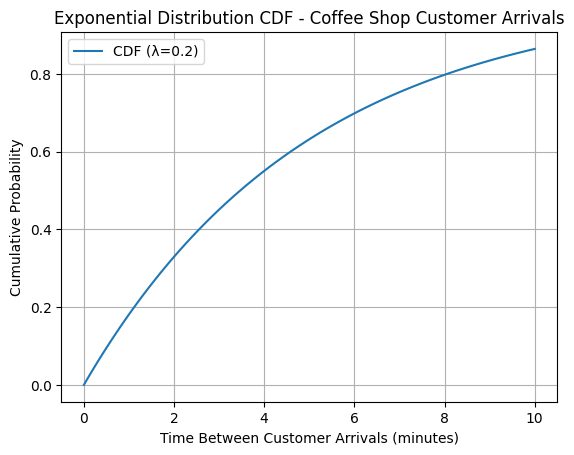

In [ ]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# Parameters specific to your coffee shop
lambda_value = 0.2  # Average customer arrival rate (customers per minute)
scale_parameter = 1 / lambda_value  # Scale parameter (1/λ)

# Generate a range of x values for the CDF plot (time between customer arrivals)
x = np.linspace(0, 10, 100)

# Calculate the CDF values for these x values
cdf_values = expon.cdf(x, loc=0, scale=scale_parameter)

# Create a plot of the CDF
plt.plot(x, cdf_values, label=f'CDF (λ={lambda_value})')
plt.xlabel('Time Between Customer Arrivals (minutes)')
plt.ylabel('Cumulative Probability')
plt.title('Exponential Distribution CDF - Coffee Shop Customer Arrivals')
plt.legend()
plt.grid(True)

# Find a point that has a right probability of 0.3
right_probability = 0.3
right_point = expon.isf(right_probability, loc=0, scale=scale_parameter)

# Find a point that has a left probability of 0.2
left_probability = 0.2
left_point = expon.isf(1 - left_probability, loc=0, scale=scale_parameter)

plt.show()


In the context of the coffee shop's customer arrival model, there's a 30% chance that a customer will arrive within approximately 6.02 minutes.

This suggests that if you're interested in finding the time it takes for a customer to arrive with a 30% probability of it happening within a given time frame, you can expect it to happen within about 6.02 minutes, based on the exponential distribution model with a rate parameter ('λ') specific to your coffee shop.

The value represents the time at which there's a 30% cumulative probability of customer arrival. So, it doesn't mean that every customer arrives precisely at 6.02 minutes, but rather that there's a 30% chance they will arrive within that time frame. Similarly, there is a probability of 0.2 (or 20%) that a customer will arrive within 1.12 minutes.

To provide an example, if this were the customer arrival scenario in a coffee shop with an exponential distribution model, this statement would mean that there's a 20% chance that a customer will arrive within 1.12 minutes after the previous customer. It's a way of quantifying the likelihood of events happening within certain timeframes in the context of exponential distributions.

0.07438118377140324
0.40132426810864535


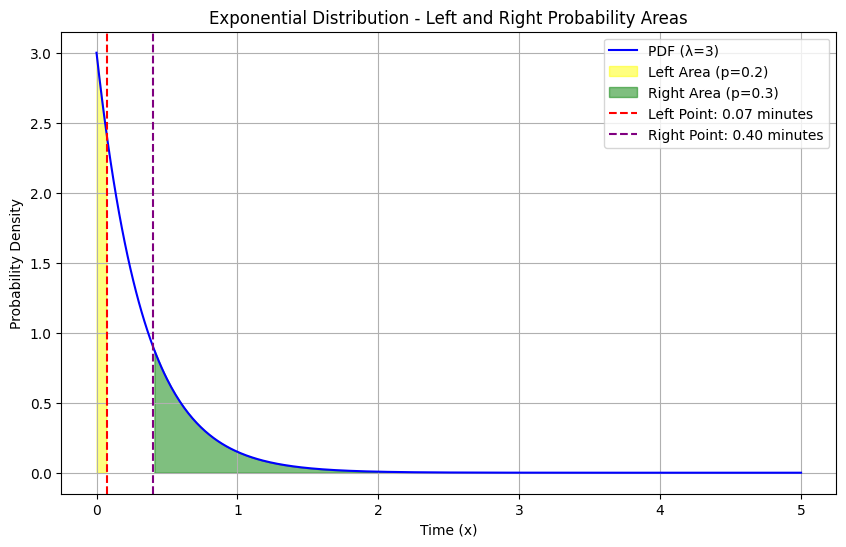

In [4]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

# Parameters for the exponential distribution
lambda_value = 3  # Rate parameter (λ)
scale_parameter = 1 / lambda_value  # Scale parameter (1/λ)

# Create a range of x values for the PDF and CDF plots
x = np.linspace(0, 5, 500)

# Calculate the PDF values
pdf_values = expon.pdf(x, loc=0, scale=scale_parameter)

# Calculate the CDF values
cdf_values = expon.cdf(x, loc=0, scale=scale_parameter)

# Define the probability levels for left and right areas
left_probability = 0.2
right_probability = 0.3

# Find the points for the left and right probabilities
left_point = expon.isf(1 - left_probability, loc=0, scale=scale_parameter)
right_point = expon.isf(right_probability, loc=0, scale=scale_parameter)

print(left_point)
print(right_point)

# Create a plot to show the PDF and highlight the areas for left and right probabilities
plt.figure(figsize=(10, 6))

# Plot the PDF
plt.plot(x, pdf_values, label=f'PDF (λ={lambda_value})', color='blue')
plt.fill_between(x, pdf_values, where=(x <= left_point), color='yellow', alpha=0.5, label=f'Left Area (p={left_probability})')
plt.fill_between(x, pdf_values, where=(x >= right_point), color='green', alpha=0.5, label=f'Right Area (p={right_probability})')

# Plot the vertical lines for the left and right points
plt.axvline(left_point, color='red', linestyle='--', label=f'Left Point: {left_point:.2f} minutes')
plt.axvline(right_point, color='purple', linestyle='--', label=f'Right Point: {right_point:.2f} minutes')

plt.xlabel('Time (x)')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution - Left and Right Probability Areas')
plt.legend()
plt.grid(True)

plt.show()


Where;

**The blue line**: represents the Probability Density Function (PDF) of the exponential distribution. It shows the probability density of time intervals between events (e.g., customer arrivals at the coffee shop) for different values of 'x.'

**Yellow Shaded Area:** Highlights the region where 'x' is less than or equal to the 'left_point' value. In this specific case, it represents the area where the probability is equal to or less than 'left_probability' (which is 0.2 in this example). This area is often used to represent cumulative probabilities (the probability of events occurring up to a certain time).


**The green shaded area:**highlights the region where 'x' is greater than or equal to the 'right_point' value. It represents the area where the probability is equal to or greater than 'right_probability' (0.3 in this example). This area is often used to represent the probability of future events occurring beyond a certain time.

**Red Vertical Line:** The red vertical dashed line corresponds to the 'left_point' value and represents the point where the cumulative probability reaches the specified 'left_probability' (0.2). It marks the time interval within which the event of interest (e.g., customer arrival) occurs with the desired probability.


**Purple Vertical Line:** Corresponds to the 'right_point' value and represents the point where the cumulative probability reaches the specified 'right_probability' (0.3). It marks the time interval beyond which the event occurs with the desired probability.





**Example**

In [5]:
X = 0.5
lam = 3
print(f'The left probability of point {X} in the Exp({lam}) Distribution is: ', expon.cdf(X, scale=1/lam))
print(f'The Right probability of point {X} in the Exp({lam})) Distribution is: ', expon.sf(X, scale=1/lam))

The left probability of point 0.5 in the Exp(3) Distribution is:  0.7768698398515702
The Right probability of point 0.5 in the Exp(3)) Distribution is:  0.22313016014842982


X = 0.5: This sets 'X' to 0.5, which represents the point in time for which you want to calculate the left and right probabilities in the exponential distribution.

lam = 3: This sets the rate parameter ('λ') to 3, representing the average rate of events per unit of time in the exponential distribution.

expon.cdf(X, scale=1/lam): This line calculates the Cumulative Distribution Function (CDF) for 'X' in the exponential distribution with the given 'λ'. It represents the probability that an event occurs up to the specified time 'X'.

expon.sf(X, scale=1/lam): This line calculates the Survival Function (SF) for 'X' in the exponential distribution with the given 'λ'. It represents the probability that an event occurs after the specified time 'X'.



**Interpretation Of Output**

"The left probability of point 0.5" tells you that there's a probability of approximately 77.69% that an event will occur before or at time '0.5' in the exponential distribution with a rate of 3.

"The Right probability of point 0.5" tells you that there's a probability of approximately 22.31% that an event will occur after time '0.5' in the exponential distribution with a rate of 3.



#Appendix

**Exponential Distribution:**

The exponential distribution models the time between events occurring at a constant average rate.
Key parameter: λ (lambda) represents the rate of events per unit of time.
Probability Density Function (PDF):

**PDF:**

>f(x) = λ * e^(-λx)

Describes the probability of a specific time interval between events (x).

Provides probability density, not cumulative probabilities.


**Cumulative Distribution Function (CDF):**

CDF: F(x) = 1 - e^(-λx)
Represents the probability of events occurring up to a specific time 'x.'
Useful for calculating cumulative probabilities.
Scale Parameter:

The scale parameter is the reciprocal of λ, denoted as 1/λ.
It represents the average time between events.
Left and Right Probabilities:

**Left Probability:** Probability that an event occurs before or at a specified time.
Right Probability: Probability that an event occurs after a specified time.


**Python Code for Exponential Distribution:**

Generating PDF: expon.pdf(x, loc=0, scale=1/λ)

Calculating CDF: expon.cdf(x, loc=0, scale=1/λ)

Finding points with specific probabilities:

expon.isf(p, loc=0, scale=1/λ) and expon.sf(p, loc=0, scale=1/λ)


 **Mean and Variance**: The mean (average) of the exponential distribution is (1/lambda), and the variance is ((1/lambda)^2).

 **Exponential Decay**: The PDF of the exponential distribution is a monotonically decreasing function, which means that the probability of an event occurring decreases as time between events increases.

 **Non-Negativity**: The exponential distribution deals with non-negative values only, as it models time intervals or waiting times, which cannot be negative.

 **Survival Function**: The survival function (S(x)) represents the probability that an event will occur after a certain amount of time (x). It is defined as (S(x) = 1 - F(x)), where (F(x)) is the cumulative distribution function (CDF).



**Practical Applications:**

Modeling customer arrivals at a coffee shop.
Analyzing time intervals between website clicks.
Predicting the time until equipment failure.
Interpretation:

λ represents the rate of events per unit of time.
1/λ represents the average time between events.
PDF provides the density of events at a specific time 'x.'
CDF helps calculate cumulative probabilities.

# Additional Reading


[Statisticsbyjim](https://statisticsbyjim.com/probability/exponential-distribution/)

[Statlect](https://www.statlect.com/probability-distributions/exponential-distribution)

[Libretexts](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/14%3A_The_Poisson_Process/14.02%3A_The_Exponential_Distribution)


[Statisticshowto](https://www.statisticshowto.com/exponential-distribution/)


[P.S.U](https://online.stat.psu.edu/stat414/lesson/15/15.1)

[Pressbooks.bccampus](
https://pressbooks.bccampus.ca/northcanadabusinessstats/chapter/the-exponential-distribution/
)

[U.N.F](https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/Distributions1.pdf)



[Plus](https://plus.maths.org/content/exponential-distribution)


[Statology](https://www.statology.org/exponential-distribution/)

